In [2]:
import numpy as np
import matplotlib.pyplot as plt



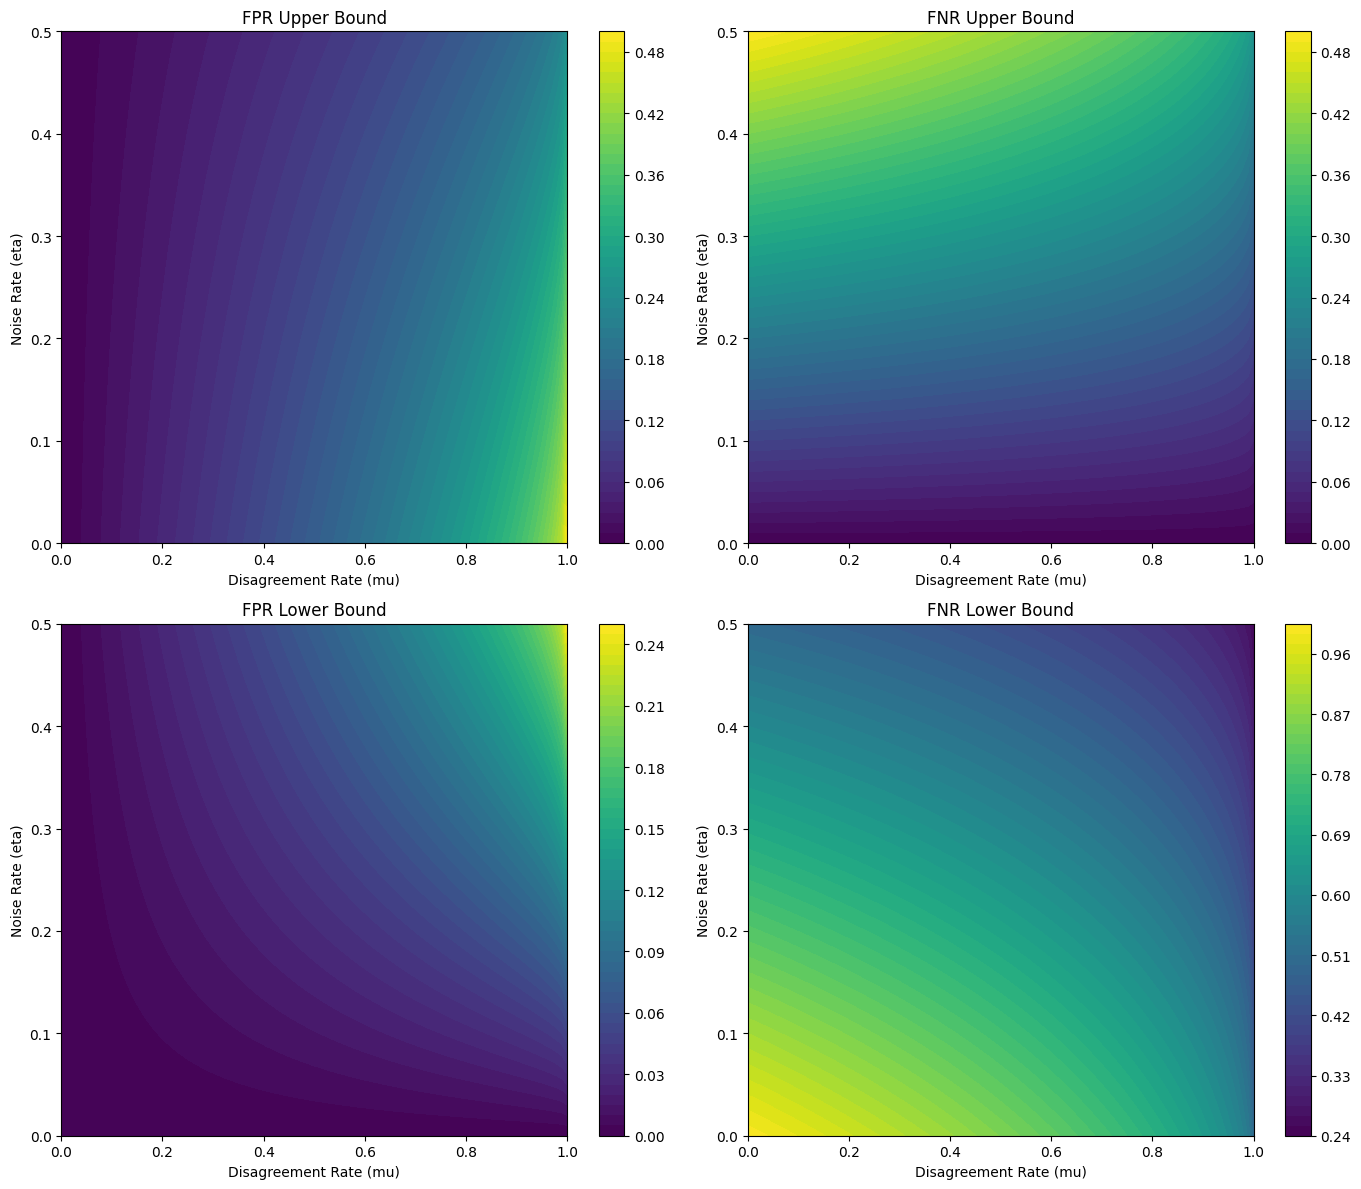

In [3]:
# Define the range of values for noise rate (eta) and disagreement rate (mu)
eta_values = np.linspace(0, 0.5, 100)
mu_values = np.linspace(0, 1, 100)
k = 2  # Assuming binary classification

# Initialize arrays to store FPR and FNR bounds
FPR_UB = np.zeros((len(eta_values), len(mu_values)))
FNR_UB = np.zeros((len(eta_values), len(mu_values)))
FPR_LB = np.zeros((len(eta_values), len(mu_values)))
FNR_LB = np.zeros((len(eta_values), len(mu_values)))

# Compute FPR and FNR bounds for each combination of eta and mu
for i, eta in enumerate(eta_values):
    for j, mu in enumerate(mu_values):
        epsilon = (1 - np.sqrt(1 - mu * (k - 1))) / 2
        FPR_UB[i, j] = epsilon * (1 - eta)
        FNR_UB[i, j] = (1 - epsilon) * eta
        FPR_LB[i, j] = epsilon * eta
        FNR_LB[i, j] = (1 - epsilon) * (1 - eta)

# Create the plot
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# Plot FPR Upper Bound
c1 = ax[0, 0].contourf(mu_values, eta_values, FPR_UB, levels=50, cmap='viridis')
fig.colorbar(c1, ax=ax[0, 0])
ax[0, 0].set_title('FPR Upper Bound')
ax[0, 0].set_xlabel('Disagreement Rate (mu)')
ax[0, 0].set_ylabel('Noise Rate (eta)')

# Plot FPR Lower Bound
c2 = ax[1, 0].contourf(mu_values, eta_values, FPR_LB, levels=50, cmap='viridis')
fig.colorbar(c2, ax=ax[1, 0])
ax[1, 0].set_title('FPR Lower Bound')
ax[1, 0].set_xlabel('Disagreement Rate (mu)')
ax[1, 0].set_ylabel('Noise Rate (eta)')

# Plot FNR Upper Bound
c3 = ax[0, 1].contourf(mu_values, eta_values, FNR_UB, levels=50, cmap='viridis')
fig.colorbar(c3, ax=ax[0, 1])
ax[0, 1].set_title('FNR Upper Bound')
ax[0, 1].set_xlabel('Disagreement Rate (mu)')
ax[0, 1].set_ylabel('Noise Rate (eta)')

# Plot FNR Lower Bound
c4 = ax[1, 1].contourf(mu_values, eta_values, FNR_LB, levels=50, cmap='viridis')
fig.colorbar(c4, ax=ax[1, 1])
ax[1, 1].set_title('FNR Lower Bound')
ax[1, 1].set_xlabel('Disagreement Rate (mu)')
ax[1, 1].set_ylabel('Noise Rate (eta)')

plt.tight_layout()
plt.show()